# Classification trees - Level 3


# 0. Problem
You have been hired by GAP as data analysts! Your first task is to predict how many units of a limited edition jumper will be purchased by the most loyal customers. To do that you and your team have conducted a survey of 701 loyal customers. You and your team collected some valuable data including age, gender, salary, how much money the customer spent that day at the store and the last month, whether the customer has used the online shop, and how many jumpers the customer bought the last year. Some of the customers reply to the last question of the survey to make it clear whether or not they will buy the limited-edition jumper. Unfortunately, the last question was not recorded for all the interviewed people. You want to know how many of the 701 interviewed customers will buy the jumper if more than 70% of the interviewed customers are likely to buy the jumper, then the limited-edition jumper will be launched, but if the percentage is lower, unfortunately, the limited-edition jumper will not see the light. To do that we have to use a classification model!

# 1. Overview

This notebook uses decision trees to classify and predict whether the age, gender, salary, how much money the customer spent today and the last month in GAP, and how many jumpers the customer bought the last year could predict the new acquisition of a jumper.

# 2. Import the following packages

Import `Pandas` as `pd` and `Numpy` as `np` </br>
From `sklearn` import `tree` and `metrics` </br>
From `sklearn.model_selection` import `train_test_split` </br>
Import `seaborn`, and `matplotlib.pyplot` as `sns` and `plt` </br>
Import `StringIO` from `sklearn.externals.six` and `Image` from `IPython.display` </br>
Import `pydotplus`

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
from IPython.display import Image 
import pydotplus

# 3. Load data 

Download the "WholeDataset.csv" from [GitHub](https://github.com/DecodedCo/Classification) to your working directory, save it as `WholeDataset.csv`.

Import the CSV file into Python.


In [3]:
# To read the dataset use the function read_csv from pandas
data = pd.read_csv("WholeDataset.csv")

# 4. Explore the data

In this part of the notebook we need to:
1. Check the first 8 observations
2. Check the dimensions of the dataset
3. Print the information of `data` including the index dtype and column dtypes, non-null values and memory usage
4. Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

## Check the first 8 observations

In [7]:
# Check the first 8 rows of the dataframe
# To do that use the function head
data.sample(8)

,age,gender,No_jumpers_per_year,spent_today,spent,salaRy,Distance,Online,Decision
4,24,female,0,20,36,14244,0.965881,0,1.0
287,57,male,2,0,0,13088,6.259451,1,0.0
618,56,Male,5,48,175,59822,1.553863,0,NaN
312,55,male,2,0,51,21591,10.010067,0,0.0
607,31,female,5,33,122,45816,1.062239,0,1.0
490,57,male,4,22,38,31970,2.104352,0,1.0
357,58,Male,3,49,181,104829,2.382216,0,NaN
90,25,Female,1,30,74,39082,2.515075,0,NaN


## Check the dimensions of the dataset

In [10]:
# Get dimensions of training dataframe
# Use the attribute .shape
data.shape

(701, 9)

## Print the information of `data` including the index dtype and column dtypes, non-null values and memory usage

In [12]:
# Get high-level information on the columns
# use the .info() function
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 9 columns):
age                    701 non-null int64
gender                 701 non-null object
No_jumpers_per_year    701 non-null int64
spent_today            701 non-null int64
spent                  701 non-null int64
salaRy                 701 non-null int64
Distance               701 non-null float64
Online                 701 non-null int64
Decision               473 non-null float64
dtypes: float64(2), int64(6), object(1)
memory usage: 49.4+ KB


## Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values

In [14]:
# use the function .describe()
data.describe(include="all")

,age,gender,No_jumpers_per_year,spent_today,spent,salaRy,Distance,Online,Decision
count,701.000000,701,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000,473.000000
unique,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,34.164051,NaN,2.707561,32.844508,107.834522,43860.815977,4.550152,0.532097,0.638478
std,13.777421,NaN,1.592415,15.741395,55.338217,26188.806959,3.109289,0.499325,0.480950
min,16.000000,NaN,0.000000,0.000000,0.000000,1617.000000,0.003168,0.000000,0.000000
25%,23.000000,NaN,1.000000,24.000000,62.000000,22819.000000,1.876145,0.000000,0.000000
50%,28.000000,NaN,3.000000,36.000000,113.000000,42027.000000,4.185417,1.000000,1.000000
75%,46.000000,NaN,4.000000,43.000000,150.000000,60228.000000,6.696573,1.000000,1.000000


# 5. Clean the data

In this section of the notebook, we need to clean the data.
We need to:
1. Let's change the column names to something more meaningful
2. Tidy the factors of the column gender - avoid redundancy
3. Replace 1 and 0 with "Yes" and "No" in the `Decision` column

## Let's change the column names to something more meaningful
Change the name of the columns `spent` and `salaRy` to `spent_month` and `salary`, respectively

In [16]:
# Check out the column names
# use the attribute .columns
data.columns

Index(['age', 'gender', 'No_jumpers_per_year', 'spent_today', 'spent',
       'salaRy', 'Distance', 'Online', 'Decision'],
      dtype='object')

In [17]:
# Change the name of the columns spent and salaRy using the function .rename()
# use the parameter column to define the old and new names
# use inplace = True
data.rename(columns= {"spent" : "spent_month","salaRy":"salary"},
            inplace = True)

In [18]:
# Check out the column names
data.columns

Index(['age', 'gender', 'No_jumpers_per_year', 'spent_today', 'spent_month',
       'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')

##  Tidy the factors of the column `gender` - avoid redundancy

In [21]:
# Let's have a look at the column "gender"
# Use the function .describe()
data.gender.describe()

count        701
unique         6
top       female
freq         266
Name: gender, dtype: object

In [22]:
# Let's check the unique values of the column "gender"
data.gender.unique()

array(['female', 'M', 'male', 'Female', 'Male', 'm'], dtype=object)

Replace the redundant values of the column `gender` using only `Female` and `Male`

In [23]:
# Use the function .replace() on the column "gender"; replace female with Female
data.gender = data.gender.replace("female","Female")

In [24]:
# Let's check the unique values of the column "gender"
data.gender.unique()

array(['Female', 'M', 'male', 'Male', 'm'], dtype=object)

In [27]:
# Use the function .replace() on the column "gender"; replace "male", "M", "m" with "Male"
data.gender = data.gender.replace(["male","M","m"],"Male")

In [28]:
# Let's check the unique values of the column "gender"
data.gender.unique()

array(['Female', 'Male'], dtype=object)

## Replace 1 and 0 with "Yes" and "No" in the `Decision` column

In [29]:
# use the function .replace() on the column 'Decision'; replace 1 and 0 with "YES" and "NO"
data["Decision"]= data.Decision.replace(1, "Yes")
data["Decision"]= data.Decision.replace(0, "No")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 9 columns):
age                    701 non-null int64
gender                 701 non-null object
No_jumpers_per_year    701 non-null int64
spent_today            701 non-null int64
spent_month            701 non-null int64
salary                 701 non-null int64
Distance               701 non-null float64
Online                 701 non-null int64
Decision               473 non-null object
dtypes: float64(1), int64(6), object(2)
memory usage: 49.4+ KB


# 6. Spliting the dataset into NOPredict and Predict
In this section of the notebook we need to:
1. Drop all the empty values of the `Decision` column and save it as NOPredict
2. Explore the data using boxplots and scatter plots of several variables in the y-axis and the decision on the x-axis
3. Use the subset with all empty values in the column `Decision` and save it as Predict
4. Divide the NOPredict subset into X and y, and then into train and test subsets for X and y
5. Create the dummy variables to deal with categorical inputs

## Drop all the empty values of the `Decision` column and save it as NOPredict

In [33]:
# NoPredict is the dataset with the known values for the decision
# Use the function .dropna()
NOPredict=data.dropna()
NOPredict.Decision.describe()

count     473
unique      2
top       Yes
freq      302
Name: Decision, dtype: object

## Explore the data using boxplots and scatter plots of several variables in the y-axis and the decision on the x-axis

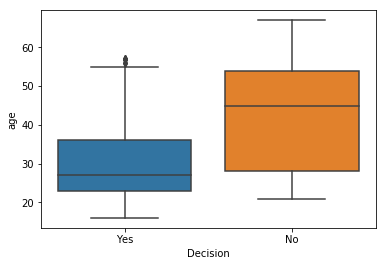

In [36]:
# Exploring the NOPredict
# Select for the y axis any variable and compare it with the decision column
# Can you find a single variable that will help us to classify the decision column
sns.boxplot(x="Decision",y="age",data=NOPredict)
plt.show()

T:\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


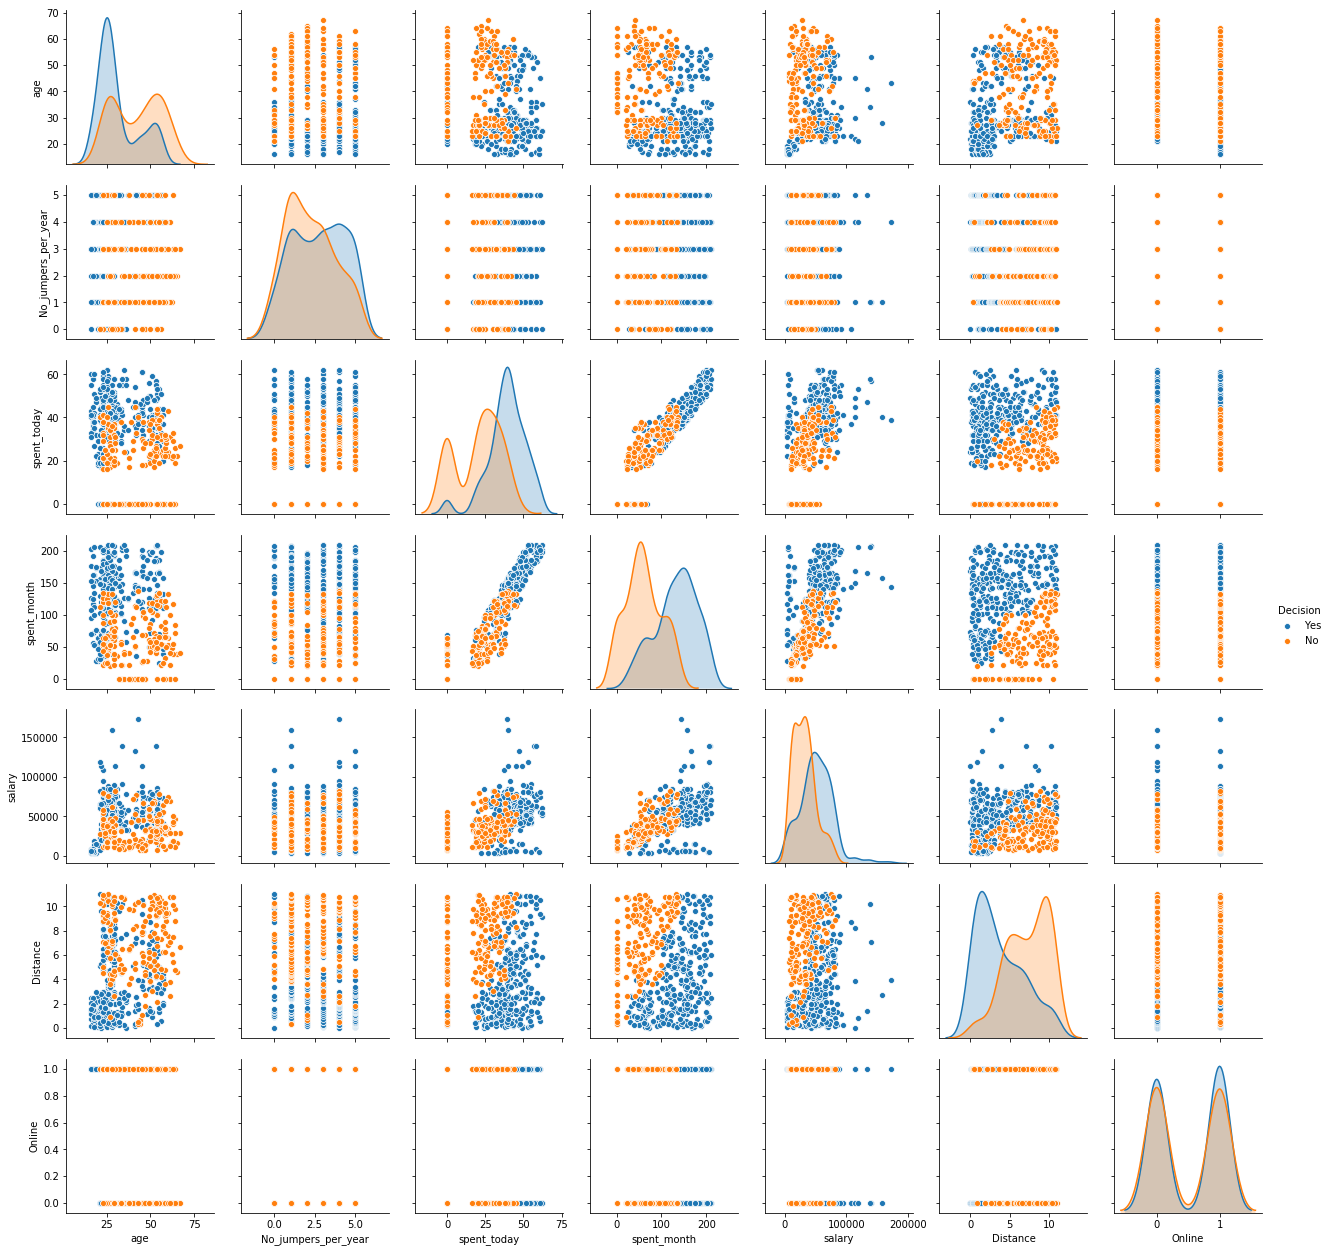

In [46]:
sns.pairplot(NOPredict,hue="Decision")

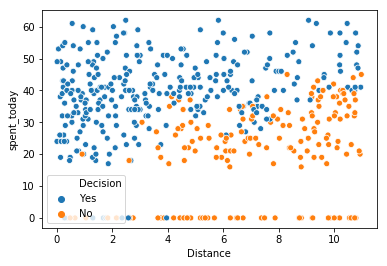

In [44]:
# Exploring the NOPredict
# Select for the x and y axis any variable and compare them with the decision column using the parameter hue = "Decision"
# Can you find a single variable that will help us to classify the decision column
sns.scatterplot(x="Distance",y="spent_today",hue="Decision",data=NOPredict)

## Use the subset with all empty values in the column `Decision` and save it as Predict

In [48]:
# use the function pd.isnull to subset the data with only null values
Predict=data[pd.isnull(data.Decision)]
Predict.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 1 to 700
Data columns (total 9 columns):
age                    228 non-null int64
gender                 228 non-null object
No_jumpers_per_year    228 non-null int64
spent_today            228 non-null int64
spent_month            228 non-null int64
salary                 228 non-null int64
Distance               228 non-null float64
Online                 228 non-null int64
Decision               0 non-null object
dtypes: float64(1), int64(6), object(2)
memory usage: 17.8+ KB


In [49]:
# use .describe to see a summary of Predict
Predict.describe()

,age,No_jumpers_per_year,spent_today,spent_month,salary,Distance,Online
count,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000,228.000000
mean,31.802632,2.960526,33.394737,110.407895,41923.741228,3.428836,0.570175
std,14.302293,1.585514,15.697930,53.786536,27406.768360,2.153102,0.496140
min,16.000000,0.000000,0.000000,0.000000,1617.000000,0.010048,0.000000
25%,22.000000,2.000000,25.750000,65.000000,15911.500000,1.699408,0.000000
50%,25.000000,3.000000,37.000000,113.500000,40987.500000,3.208673,1.000000
75%,39.000000,4.000000,44.000000,151.250000,58537.000000,5.261184,1.000000
max,67.000000,5.000000,62.000000,210.000000,182058.000000,10.871566,1.000000


In [51]:
#Let's check the names of the columns first
NOPredict.describe()

,age,No_jumpers_per_year,spent_today,spent_month,salary,Distance,Online
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,35.302326,2.585624,32.579281,106.594080,44794.543340,5.090660,0.513742
std,13.384294,1.583002,15.772030,56.084758,25558.295876,3.347834,0.500340
min,16.000000,0.000000,0.000000,0.000000,3150.000000,0.003168,0.000000
25%,25.000000,1.000000,24.000000,60.000000,27459.000000,2.069169,0.000000
50%,29.000000,3.000000,35.000000,113.000000,42794.000000,4.831928,1.000000
75%,49.000000,4.000000,43.000000,150.000000,61629.000000,7.848927,1.000000
max,67.000000,5.000000,62.000000,210.000000,172658.000000,10.986203,1.000000


## Divide the NOPredict subset into X and y

In [56]:
# Feature selection 
feature_cols = ["age", "gender", "No_jumpers_per_year", "spent_today", "spent_month",
       "salary", "Distance", "Online"]
X = NOPredict[feature_cols]
y = NOPredict.Decision

## Subset X and y into X_train, X_test, y_train, y_test

In [59]:
# Subset X and y using the function train_test_split
# call the results X_train, X_test, y_train, y_test
# use 75% for the train size
# set the random seed to 246
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=123)

## Create the dummy variables to deal with categorical inputs

In [62]:
# One-hot encoding all features in training set (X_train)
X_train = pd.get_dummies(X_train)

# One-hot encoding all features in testing set (X_test)
X_test = pd.get_dummies(X_test)

#X_train.sample(8)
X_test.sample(8)

,age,No_jumpers_per_year,spent_today,spent_month,salary,Distance,Online,gender_Female,gender_Male
488,30,4,40,150,84424,2.003490,1,0,1
463,25,4,43,154,73258,0.554669,1,0,1
20,27,0,17,49,32360,4.040501,1,1,0
71,23,1,37,99,56572,1.059020,0,0,1
113,28,1,35,54,22652,4.064549,1,0,1
674,23,5,45,122,78030,6.026889,1,1,0
445,29,3,32,67,30217,10.735066,0,1,0
256,28,2,0,63,34925,4.443296,1,0,1


# 7. Running the model 
Let's check the documentation of scikit-learn about decision trees https://scikit-learn.org/stable/modules/tree.html </br>
Check out in particular section `1.10.5. Tips on practical use`

Your facilitator will be walking through this section

##Decision tree algos to remember for exams
##### ID3 = iterative dichotomiser
##### C4.5 and C5.0
##### Classification and regression trees (CART)

genie = 0.5 50% of data points in node belong to a category
entropy 0 is organisied, 1 is chaotic

## Entropy model - no max_depth

In [64]:
clf_entropy = tree.DecisionTreeClassifier("entropy", random_state = 1234)
clf_entropy.fit(X_train,y_train)
y_pred = clf_entropy.predict(X_test)
y_pred = pd.Series(y_pred)
clf_entropy

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

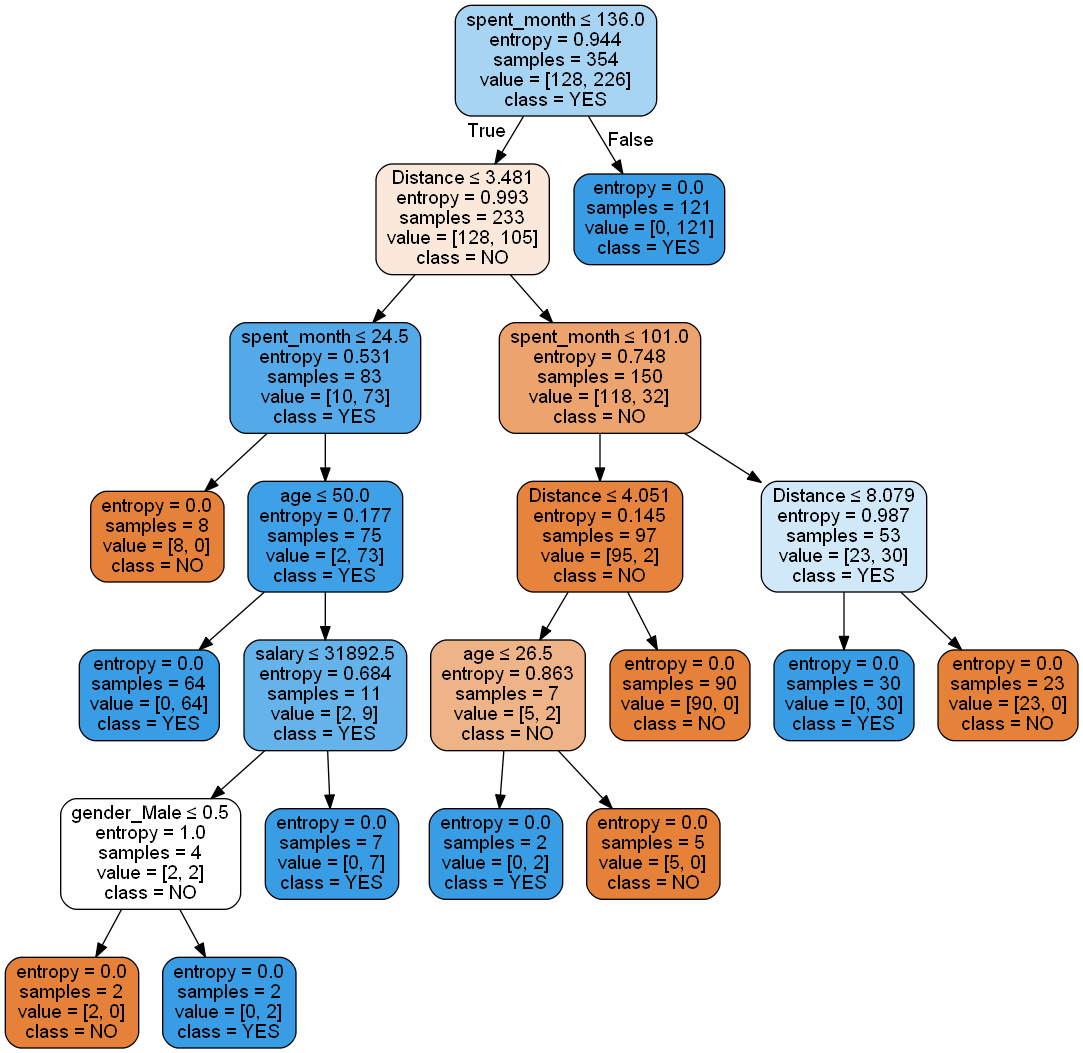

In [65]:
dot_data = StringIO()
tree.export_graphviz(clf_entropy, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"]) 
# Alternatively for class_names use clf_entropy.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [69]:
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
#print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "Yes"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "No"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "Yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "No"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Precision score for "Yes" 0.987012987012987
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.9767441860465116


## Gini impurity model - no max_depth

In [71]:
clf_gini = tree.DecisionTreeClassifier("gini", random_state = 1234)
clf_gini.fit(X_train,y_train)
y_pred = clf_gini.predict(X_test)
y_pred = pd.Series(y_pred)
clf_gini

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

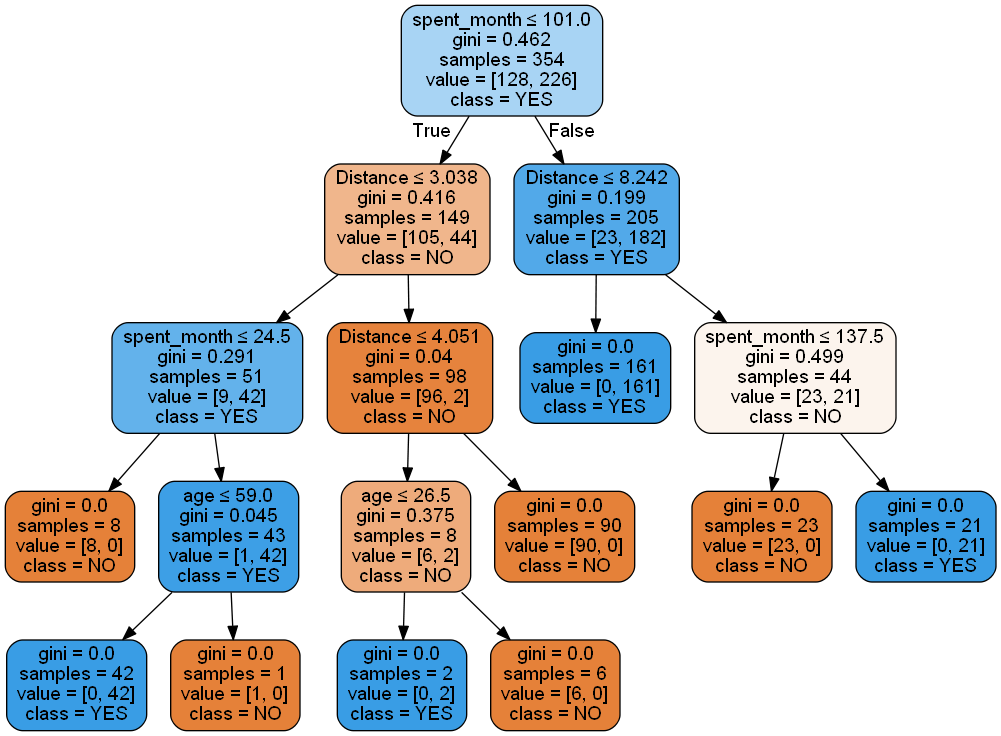

In [72]:
dot_data = StringIO()
tree.export_graphviz(clf_gini,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [73]:
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
#print("Balanced accuracy:", - - -)
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "Yes"))
print('Recall score' , metrics.precision_score(y_test,y_pred, pos_label = "No"))

Model Gini impurity model
Accuracy: 0.9915966386554622
Precision score 0.987012987012987
Recall score 1.0


## Entropy model model - max_depth 3

In [74]:
clf_entropy_3 = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 3, random_state = 1234)
clf_entropy_3.fit(X_train, y_train)
y_pred = clf_entropy_3.predict(X_test)
y_pred = pd.Series(y_pred)
clf_entropy_3

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

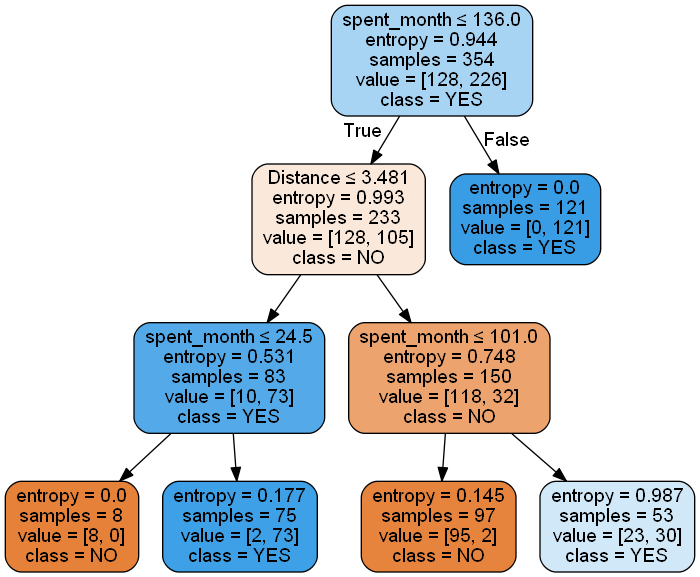

In [79]:
dot_data = StringIO()
tree.export_graphviz(clf_entropy_3,out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [81]:
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
#print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "Yes"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "No"))

Model Entropy model max depth 3
Accuracy: 0.9159663865546218
Precision score for "Yes" 0.8928571428571429
Recall score for "No" 0.7906976744186046


## Gini impurity  model - max depth 3

In [82]:
clf_gini_3 = tree.DecisionTreeClassifier(criterion='gini', random_state = 1234, max_depth = 3)
clf_gini_3.fit(X_train, y_train)
y_pred = clf_gini_3.predict(X_test)
y_pred = pd.Series(y_pred)
clf_gini

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

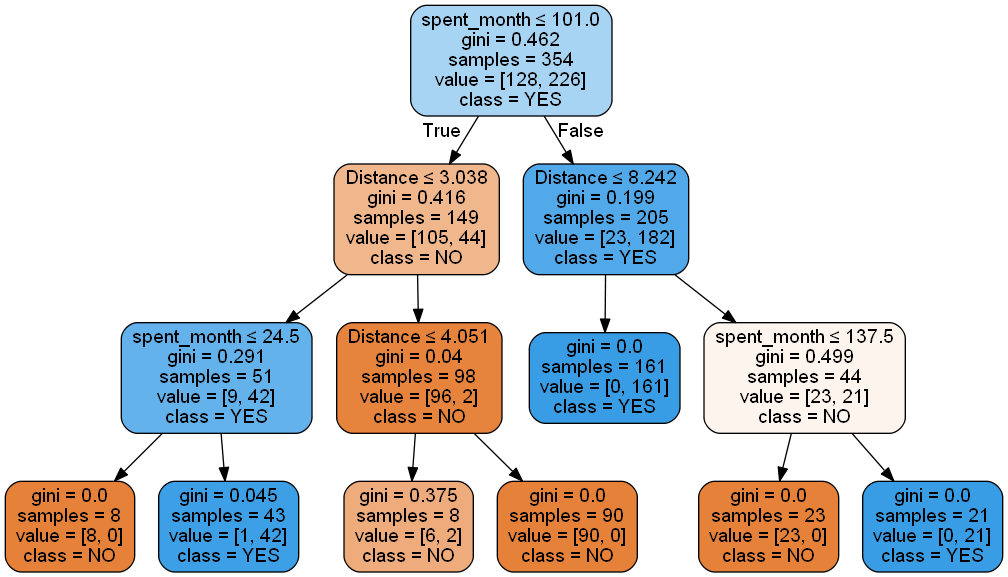

In [83]:
dot_data = StringIO()
tree.export_graphviz(clf_gini_3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ["NO", "YES"])
# Alternatively for class_names use clf_entropy.classes_
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [86]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
#print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "Yes"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "No"))

Gini impurity  model - max depth 3
Accuracy: 0.9831932773109243
Precision score 0.9868421052631579
Recall score 0.9767441860465116


### Which model are you going to use?

## Now it is time to count how many loyal customers are going to buy the jumper
 1. Let's calculate from the original dataset how many loyal customers said originally and explicitly that they will purchase the limited-edition jumper

In [87]:
data["Decision"].value_counts()

Yes    302
No     171
Name: Decision, dtype: int64

2. Let's calculate the number of people that according to the model will be willing to purchase the jumper </br>
a. Subset the Predict dataset into `new_X` considering all the variables except `Decision` </br>
b. Use that dataset to predict a new variable called `potential_buyers`

In [88]:
# Feature selection 
feature_cols = ["age", "gender", "No_jumpers_per_year", "spent_today", "spent_month",
       "salary", "Distance", "Online"]
new_X = Predict[feature_cols]

In [89]:
# One-hot encoding all features in training set
new_X = pd.get_dummies(new_X)
potential_buyers = clf_gini.predict(new_X)

In [90]:
np.unique(potential_buyers, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([ 51, 177], dtype=int64))

The total number of potential buyers is 302 + 177 = 479

In [91]:
print("The total number of interviewed people was", data.salary.count())

The total number of interviewed people was 701


In [92]:
# Let's calculate the proportion of buyers
479/701

0.6833095577746077

In [93]:
print("Only ", round((479/701)*100, 2), "% of people want to buy the limited edition jumper" )

Only  68.33 % of people want to buy the limited edition jumper


## Conclusion
Target was missed.